In [1]:
"""
What? Tune learning rate & number of trees in XGBoost

A problem with gradient boosted decision trees is that they are quick to learn 
and overfit training data. One effective way to slow down learning in the gradient
boosting model is to use a learning rate, also called shrinkage 

https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
"""

'\nWhat? Tune learning rate & number of trees in XGBoost\n\n\nA problem with gradient boosted decision trees is that they are quick to learn \nand overfit training data. One effective way to slow down learning in the gradient\nboosting model is to use a learning rate, also called shrinkage \n\nDate: 02/12/20\nReference: XGBoost with pyton, Jason Borwnlee\n'

In [8]:
# Import python modules
from pylab import rcParams
from pandas import read_csv
from matplotlib import pyplot
from xgboost import XGBClassifier
from IPython.display import Markdown, display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

### Gradient boosting involves creating and adding trees to the model sequentially. New trees are created to correct the residual errors in the predictions from the existing sequence of trees. The effect is that the model can quickly fit, then overfit the training dataset. A technique to slow down the learning in the gradient boosting model is to apply a weighting factor for the corrections by new trees when added to the model. This weighting is called the shrinkage factor or the learning rate.

### Naive gradient boosting is the same as gradient boosting with shrinkage where the shrinkage factor is set to 1.0. Setting values less than 1.0 has the effect of making less corrections for each tree added to the model. This in turn results in more trees that must be added to the model. It is common to have small values in the range of 0.1 to 0.3, as well as values less than 0.1

In [4]:
# load data
data = read_csv('../DATASETS/train_Otto_classification.csv')
dataset = data.values
# split data into X and y
X = dataset[:,0:94]
y = dataset[:,94]

# Encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)


print("Input X shape: ", X.shape)
print("Label y shape: ", y.shape)
print("Label yEncoded shape: ", y.shape)

<span style='color:blue'>**Reading the dataset**</span>

Input X shape:  (61878, 94)
Label y shape:  (61878,)
Label yEncoded shape:  (61878,)


In [5]:
# Grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate = learning_rate)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)
grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold) 
grid_result = grid_search.fit(X, label_encoded_y)

In [6]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.001155 using {'learning_rate': 0.3}
-2.153330 (0.000009) with: {'learning_rate': 0.0001}
-1.827377 (0.000066) with: {'learning_rate': 0.001}
-0.590581 (0.000296) with: {'learning_rate': 0.01}
-0.001270 (0.001075) with: {'learning_rate': 0.1}
-0.001167 (0.001060) with: {'learning_rate': 0.2}
-0.001155 (0.001053) with: {'learning_rate': 0.3}


### Interestingly, we can see that the best learning rate was 0.2. This is a high learning rate and it suggest that perhaps the default number of trees of 100 is too low and needs to be increased/

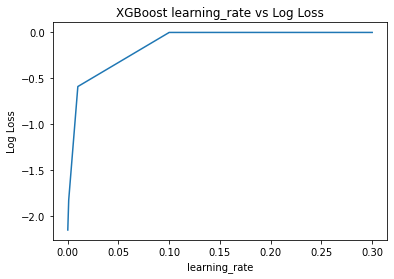

In [9]:
# plot
pyplot.errorbar(learning_rate, means, yerr=stds) 
pyplot.title("XGBoost learning_rate vs Log Loss") 
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss') 
pyplot.show()

### Tuning Learning Rate and the Number of Trees at the same time

In [ ]:
"""
There are 5 variations of n estimators and 4 variations of learning rate. 
Each combination will be evaluated using 10-fold cross-validation, so 
that is a total of 4 × 5 × 10 or 200 XGBoost models that must be trained
and evaluated.
"""

In [ ]:
# Grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold) 
grid_result = grid_search.fit(X, label_encoded_y)

In [ ]:
#  summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value)) 
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.show()

In [ ]:
"""
We can see that the expected general trend holds, where the performance 
(inverted log loss) improves as the number of trees is increased. 
Performance is generally poor for the smaller learning rates, suggesting
that a much larger number of trees may be required. We may need to increase
the number of trees to many thousands which may be quite computationally 
expensive.
"""